<a href="https://colab.research.google.com/github/thysdoo/Python-RFM-Analysis/blob/main/Python__Thuy_Do_RFM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Import Data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path = '/content/drive/MyDrive/Python - Final Project/'

Mounted at /content/drive


In [ ]:
ecom = pd.read_excel(path+"ecommerce retail.xlsx")
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
seg = pd.read_excel(path+"segmentation.xlsx")
seg.head()

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


# EDA

## EDA Commercial Retail

- Missing data: "Description" column: 1454 null value
  -> Next step: Replace with "null"
- Incorrect data types: "Customer ID" column -> Next step: change datatype to str
- Incorrect values: "Quantity" & "UnitPrice" column have negative values -> Next step: convert to positive
- Duplicate values: 5268 duplicate values -> Next step: remove duplicates
- Filtering values: "Country" column has UK transactions account for about 92% of all transactions, the remaining 8% includes other countries -> Next step: filtering only UK transactions

### 1. Check null values & data type

In [ ]:
#Check null values & data types
ecom.info()
print(ecom.isna().sum())

#Change datatype of "CustomerID" column
ecom["CustomerID"] = ecom["CustomerID"].astype(str)

#Handling missing values in "Description" column
ecom.loc[:,"Description"] = ecom.loc[:,"Description"].fillna("null")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


### 2. Get summary statistics

In [ ]:
#Summary
print(ecom.describe())

#Convert negetive values in "Quantity" & "UnitPrice" to positive
ecom.loc[:,"Quantity"] = ecom.loc[:,"Quantity"].abs()
ecom.loc[:,"UnitPrice"] = ecom.loc[:,"UnitPrice"].abs()



            Quantity                    InvoiceDate      UnitPrice
count  541909.000000                         541909  541909.000000
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114
min    -80995.000000            2010-12-01 08:26:00  -11062.060000
25%         1.000000            2011-03-28 11:34:00       1.250000
50%         3.000000            2011-07-19 17:17:00       2.080000
75%        10.000000            2011-10-19 11:27:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       218.081158                            NaN      96.759853


###3. Check duplicates


In [ ]:
no_duplicates = ecom.drop_duplicates()
print(ecom.shape, no_duplicates.shape)
ecom = no_duplicates

(541909, 8) (536641, 8)


### 4. Check categorical values

In [ ]:
#Count values of "Country" column
print(ecom["Country"].value_counts())

#Filter only UK transactions
ecom = ecom[ecom["Country"] == "United Kingdom"]


Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


### 5. Check outliers

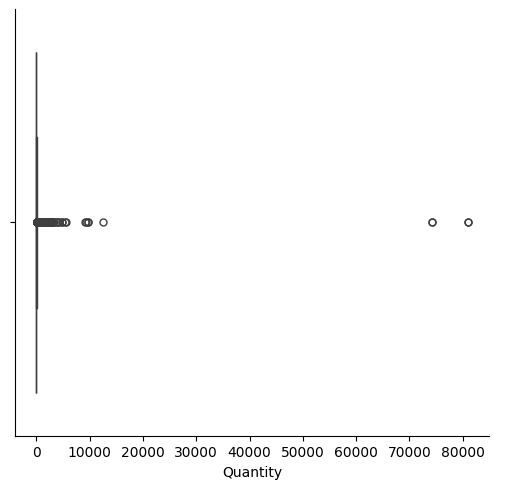

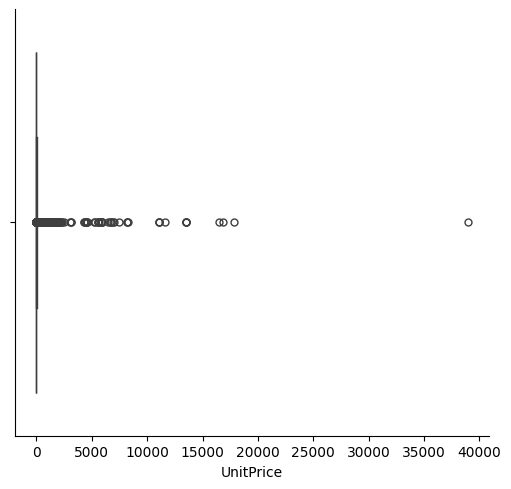

In [ ]:
#Check outliers
sns.catplot(data=ecom, kind="box", x="Quantity",whis=[5,99])
plt.show()
sns.catplot(data=ecom, kind="box", x="UnitPrice",whis=[5,99])
plt.show()


## EDA Segmentation

### Convert "RFM Score" column to row

In [ ]:
#Convert each elements in "RFM score" column to a row
seg["RFM Score"] = seg["RFM Score"].str.split(",")
seg = seg.explode("RFM Score").reset_index(drop=True)
seg["RFM Score"] = seg["RFM Score"].str.strip()
print(seg.head(10))
print(seg["Segment"].value_counts())
print(seg.info())

     Segment RFM Score
0  Champions       555
1  Champions       554
2  Champions       544
3  Champions       545
4  Champions       454
5  Champions       455
6  Champions       445
7      Loyal       543
8      Loyal       444
9      Loyal       435
Segment
Potential Loyalist       24
At Risk                  22
Promising                16
Hibernating customers    11
Loyal                     8
Need Attention            8
About To Sleep            8
Cannot Lose Them          8
Champions                 7
New Customers             7
Lost customers            6
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    125 non-null    object
 1   RFM Score  125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB
None


# RFM Score

In [ ]:
#Define end_date, sale revenue by "InvoiceNo"
end_date = pd.to_datetime("2011-12-31")
ecom["Sales"] = ecom["UnitPrice"] * ecom["Quantity"]
#Define Last purchase date, Frequency, Monetary by "CustomerID"
RFM = ecom.groupby("CustomerID").agg(LastPurchaseDate = ("InvoiceDate","max"),
                                      Frequency = ("InvoiceNo","nunique"),
                                      Monetary = ("Sales","sum")
                                      ).reset_index()

#Define Recency by "CustomerID"
RFM["Recency"] = (end_date - RFM["LastPurchaseDate"]).dt.days

#Define R score, F score, M score
RFM["R Score"] = pd.qcut(RFM["Recency"], 5, labels=[5,4,3,2,1])
RFM["F_rank"] = RFM["Frequency"].rank(method="first")
RFM["F Score"] = pd.qcut(RFM["F_rank"], 5, labels=[1, 2, 3, 4, 5])
RFM["M_rank"] = RFM["Monetary"].rank(method="first")
RFM["M Score"] = pd.qcut(RFM["M_rank"], 5, labels=[1, 2, 3, 4, 5])

#Define RFM score & segment by "CustomerID"
RFM["RFM Score"] = RFM["R Score"].astype(str) + RFM["F Score"].astype(str) + RFM["M Score"].astype(str)
RFM["Segment"] = RFM.merge(seg, on="RFM Score", how="left")["Segment"]

RFM = RFM[["CustomerID", "Recency", "R Score", "Frequency", "F Score", "Monetary", "M Score", "RFM Score", "Segment"]]


print(RFM.head(10))
print(RFM["Segment"].value_counts())




  CustomerID  Recency R Score  Frequency F Score   Monetary M Score RFM Score  \
0    12346.0      346       1          2       2  154367.20       5       125   
1    12747.0       23       5         11       5    4196.01       5       555   
2    12748.0       21       5        224       5   37700.82       5       555   
3    12749.0       24       5          8       5    4313.56       5       555   
4    12820.0       24       5          4       3     942.34       4       534   
5    12821.0      235       1          1       1      92.72       1       111   
6    12822.0       91       3          3       3     978.78       4       334   
7    12823.0       95       2          5       4    1759.50       4       244   
8    12824.0       80       3          1       1     397.12       2       312   
9    12826.0       23       5          8       5    1481.32       4       554   

          Segment  
0         At Risk  
1       Champions  
2       Champions  
3       Champions  
4  Need 

<ipython-input-10-b66b2aac4b4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecom["Sales"] = ecom["UnitPrice"] * ecom["Quantity"]


#Visualization

##Distribution

<Figure size 1200x300 with 0 Axes>

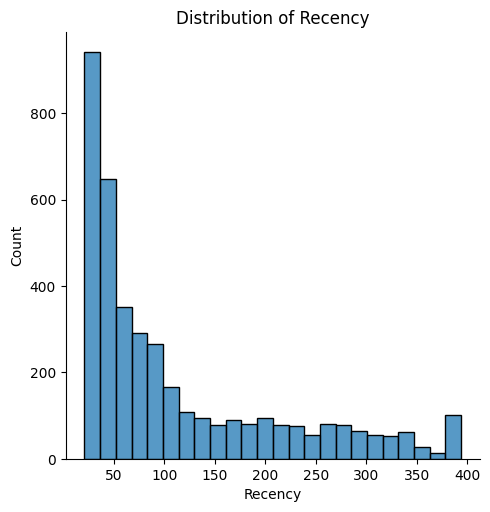

<Figure size 1200x300 with 0 Axes>

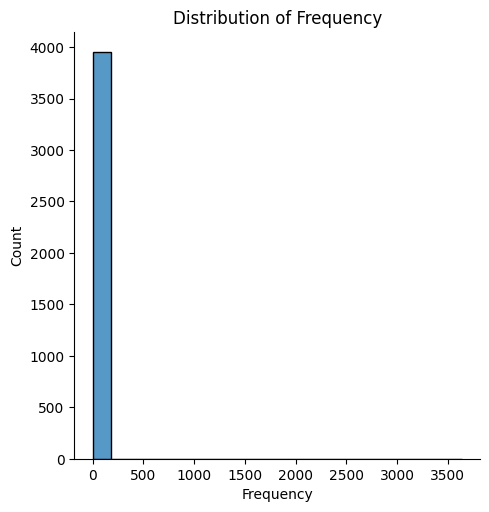

<Figure size 1200x300 with 0 Axes>

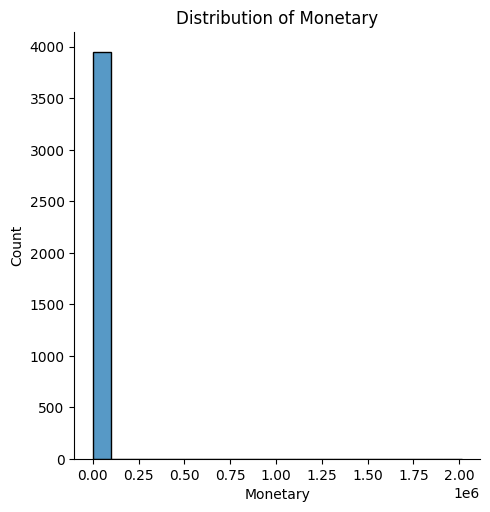

In [ ]:
#Show distribution
cols = ["Recency", "Frequency", "Monetary"]

for col in cols:
    plt.figure(figsize=(12, 3))
    if col == "Recency":
        sns.displot(RFM[col])
    else:
        sns.displot(RFM[col], bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

##Segmentation

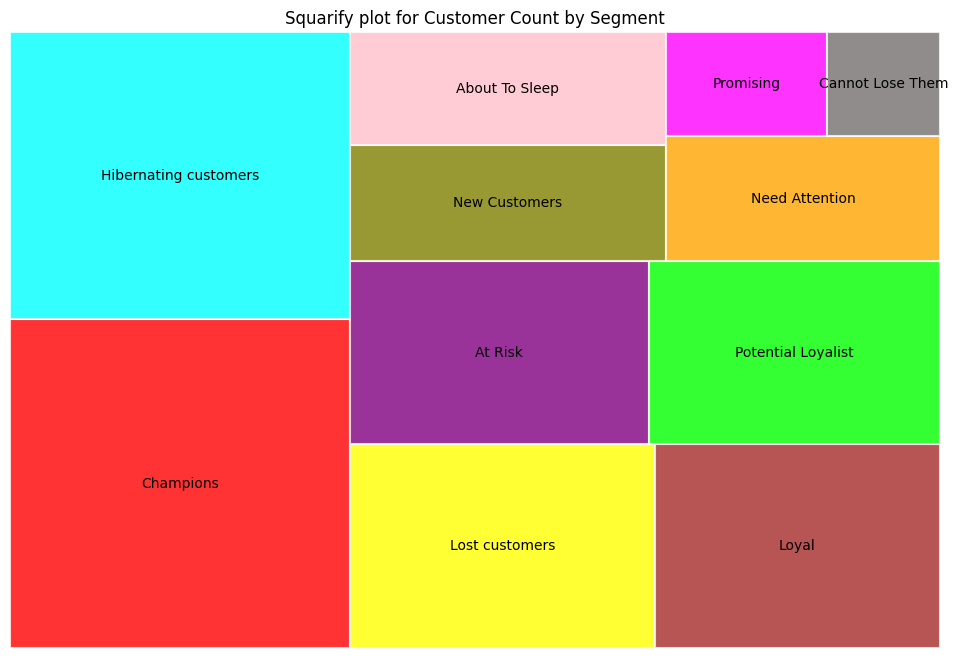

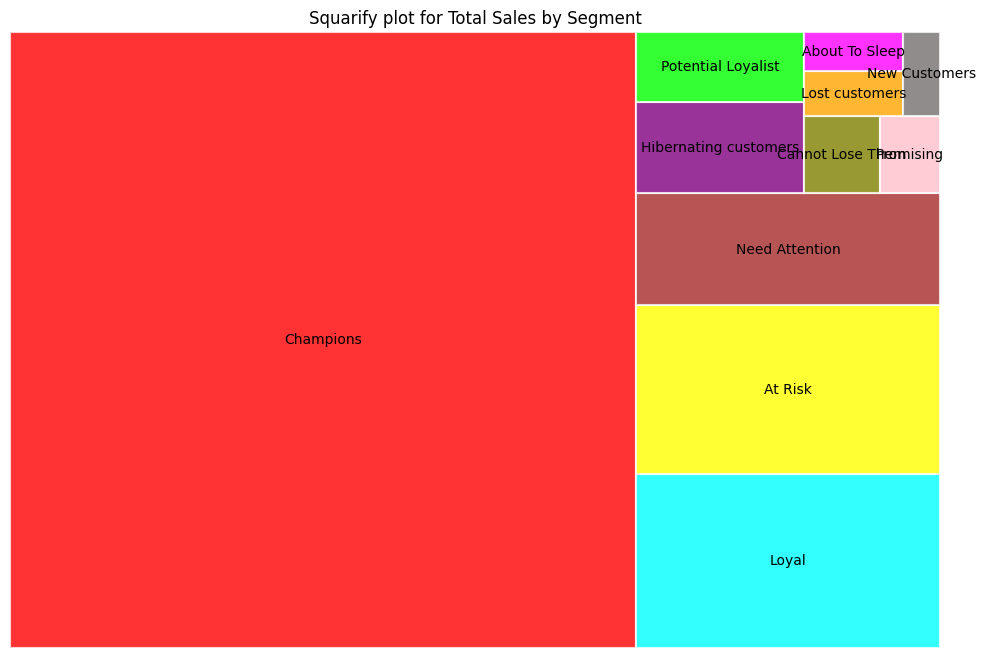

<ipython-input-16-d180b80ff093>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CustomerCount", y="Segment", data=cust_count_by_segment, palette="viridis")


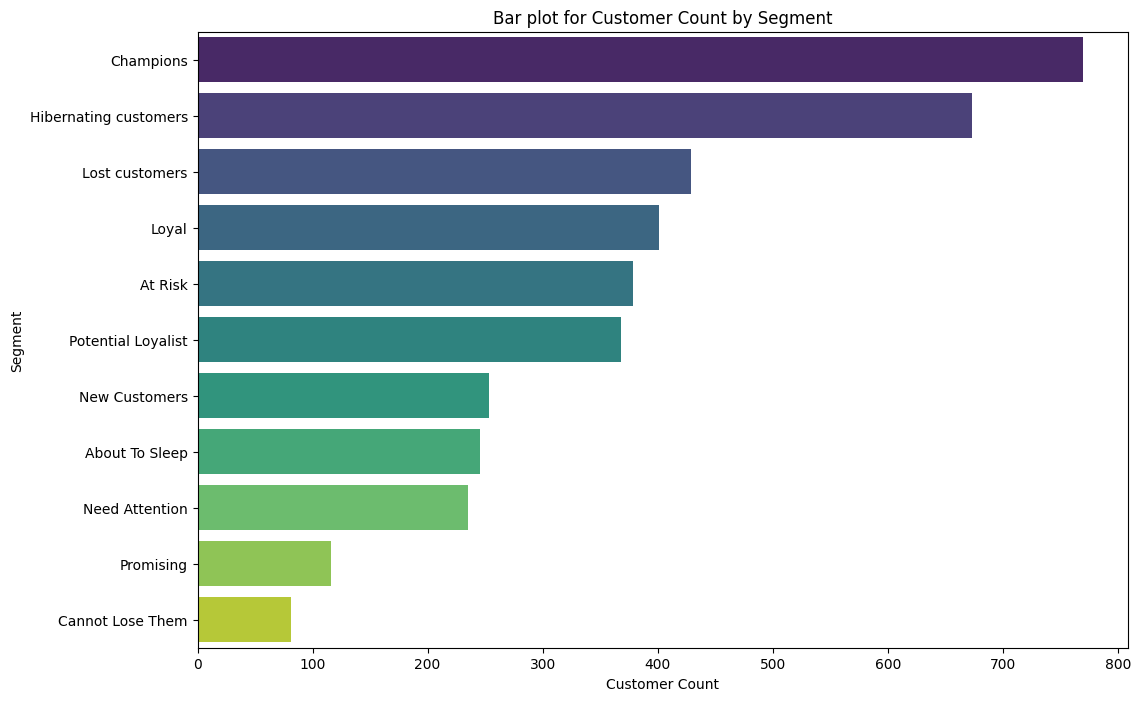

<ipython-input-16-d180b80ff093>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalSales", y="Segment", data=sales_by_segment, palette="viridis")


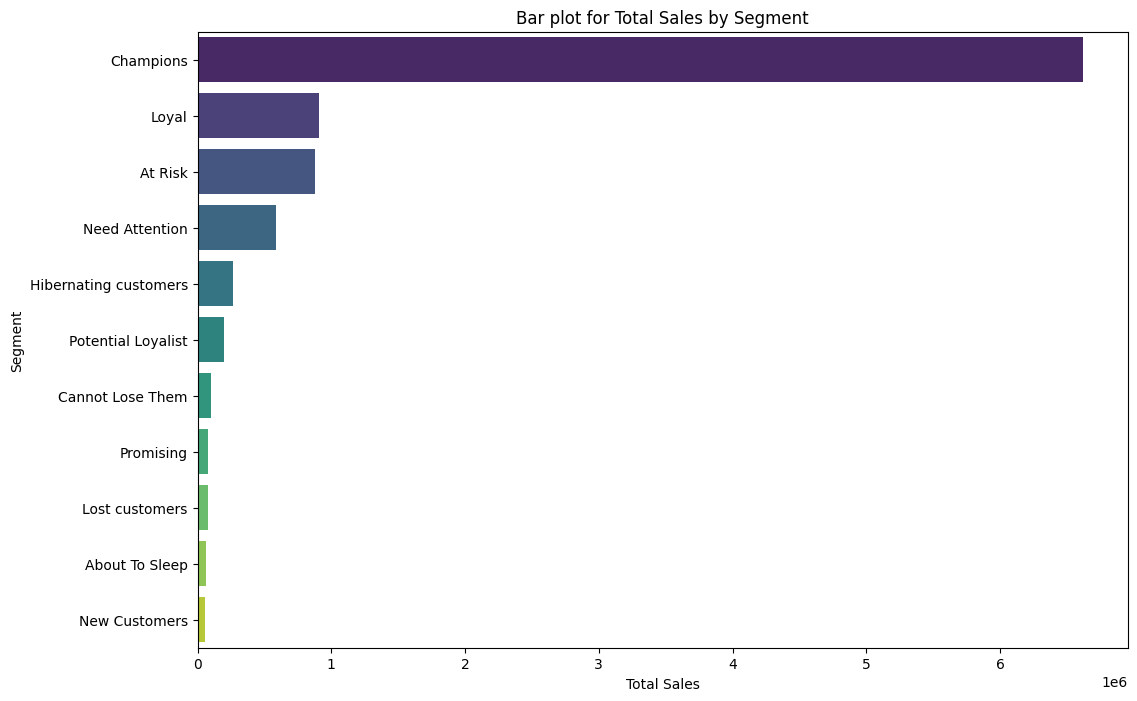

In [ ]:
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#00FF00', '#808000', '#FFC0CB', '#FFA500', '#FF00FF', '#736F6E']
!pip install squarify -qqq
import squarify

# Customer count by Segment
cust_count_by_segment = RFM.groupby("Segment")["CustomerID"].nunique().reset_index()
cust_count_by_segment.columns = ["Segment", "CustomerCount"]
cust_count_by_segment = cust_count_by_segment.sort_values(by="CustomerCount", ascending=False)

# Sales by segment
sales_by_segment = RFM.groupby("Segment")["Monetary"].sum().reset_index()
sales_by_segment.columns = ["Segment", "TotalSales"]
sales_by_segment = sales_by_segment.sort_values(by="TotalSales", ascending=False)

# Squarify plot for Customer Count
plt.figure(figsize=(12, 8))
squarify.plot(sizes=cust_count_by_segment["CustomerCount"],
              label=cust_count_by_segment["Segment"],
              color=colors,
              alpha=.8,
              bar_kwargs=dict(linewidth=1.5, edgecolor='white'))
plt.title("Squarify plot for Customer Count by Segment")
plt.axis('off')
plt.show()

# Squarify plot for Total Sales
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sales_by_segment["TotalSales"],
              label=sales_by_segment["Segment"],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor='white')
              )
plt.title("Squarify plot for Total Sales by Segment")
plt.axis('off')
plt.show()

# Bar plot for Customer CountV
plt.figure(figsize=(12, 8))
sns.barplot(x="CustomerCount", y="Segment", data=cust_count_by_segment, palette="viridis")
plt.title("Bar plot for Customer Count by Segment")
plt.xlabel("Customer Count")
plt.ylabel("Segment")
plt.show()

# Bar plot for Total Sales
plt.figure(figsize=(12, 8))
sns.barplot(x="TotalSales", y="Segment", data=sales_by_segment, palette="viridis")
plt.title("Bar plot for Total Sales by Segment")
plt.xlabel("Total Sales")
plt.ylabel("Segment")
plt.show()